# Task 2

In [976]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.datasets import load_iris

In [977]:
%matplotlib inline

### Initialization

In [978]:
iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [979]:
df['flower'] = iris.target
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [980]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [981]:
df.head(20)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [982]:
np.random.seed(200)

In [983]:
k = 3

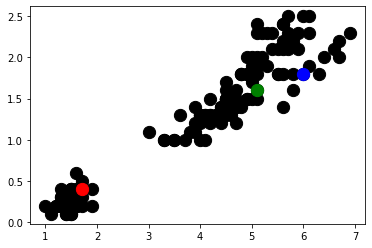

In [984]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=150, color = 'k')

#Initialize with two centroids
centroids = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8]}
#centroids = {1: [1.7, 0.4]}
#centroids = {1: [1.7, 0.4], 2: [5.1, 1.6]}
colmap = {1:'r', 2:'g', 3:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], s=150, color=colmap[i])

plt.show()

### Assignment Stage

In [985]:
def assignment(df, centroids, mode):
    for i in centroids.keys():
        if mode == 'euclidean': 

            #Using Euclidean distance as the distance metric
            df['distance_from_{}'.format(i)] = (
                np.sqrt(
                    (df['petal length (cm)'] - centroids[i][0]) ** 2
                        + (df['petal width (cm)'] - centroids[i][1]) ** 2
                        ))
        elif mode == 'cosine':
            df['distance_from_{}'.format(i)] = (np.dot(df['petal length (cm)'], centroids[i][0])/ np.sqrt(np.dot(df['petal length (cm)'], df['petal length (cm)']) * np.dot(centroids[i][0], centroids[i][0])) + np.dot(df['petal width (cm)'], centroids[i][1])/ np.sqrt(np.dot(df['petal width (cm)'], df['petal width (cm)']) * np.dot(centroids[i][1], centroids[i][1])))
        elif mode == 'jaccard':
            im1 = 0; im2 = 0 
            for j in range(1, len(df['petal length (cm)'])): 
                im1 += np.minimum(df['petal length (cm)'], centroids[i][0]) 
                im2 += np.maximum(df['petal width (cm)'], centroids[i][1]) 
            sumOfSquares = im1/im2 
            df['distance_from_{}'.format(i)] = 1 - sumOfSquares 
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids, 'euclidean')
df.head()

,petal length (cm),petal width (cm),distance_from_1,distance_from_2,distance_from_3,closest,color
0,1.4,0.2,0.360555,3.956008,4.870318,1,r
1,1.4,0.2,0.360555,3.956008,4.870318,1,r
2,1.3,0.2,0.447214,4.049691,4.964877,1,r
3,1.5,0.2,0.282843,3.862642,4.775982,1,r
4,1.4,0.2,0.360555,3.956008,4.870318,1,r


In [986]:
index, counts = np.unique(df['color'].values,return_counts=True)

    
print(counts)



[25 72 53]


In [987]:
c = df[df['color']=='r']['petal length (cm)']

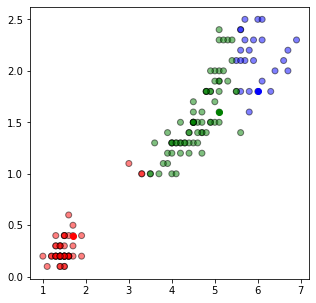

In [988]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color = df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

### Update Stage

{1: [1.560377358490566, 0.29056603773584894], 2: [4.601388888888889, 1.5444444444444443], 3: [5.9879999999999995, 2.1319999999999997]}


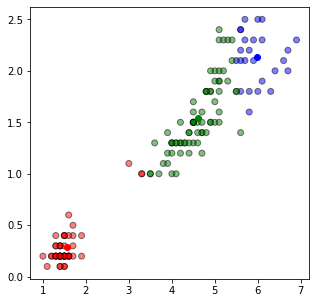

In [989]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['petal length (cm)'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['petal width (cm)'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Repeat Assignment stage

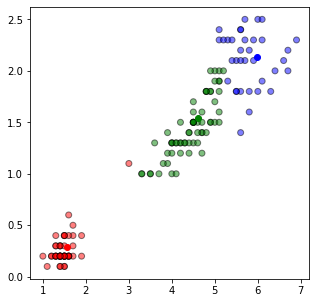

In [990]:
df = assignment(df, centroids,'euclidean')

## Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Continue until all assigned categories don't change any more

In [991]:
i = 2
while True:
    print(i ," :iteration")
    i = i+1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    print(centroids)
    df = assignment(df, centroids, 'euclidean')
    if closest_centroids.equals(df['closest']):
        break

2  :iteration
{1: [1.4921568627450983, 0.2627450980392156], 2: [4.445312500000001, 1.4468750000000001], 3: [5.802857142857142, 2.111428571428571]}
3  :iteration
{1: [1.4620000000000002, 0.2459999999999999], 2: [4.377049180327869, 1.4081967213114752], 3: [5.7333333333333325, 2.0948717948717945]}
4  :iteration
{1: [1.4620000000000002, 0.2459999999999999], 2: [4.343103448275862, 1.382758620689655], 3: [5.683333333333333, 2.0809523809523807]}
5  :iteration
{1: [1.4620000000000002, 0.2459999999999999], 2: [4.319642857142857, 1.3678571428571427], 3: [5.6522727272727264, 2.068181818181818]}
6  :iteration
{1: [1.4620000000000002, 0.2459999999999999], 2: [4.307272727272728, 1.3618181818181814], 3: [5.637777777777776, 2.0599999999999996]}
7  :iteration
{1: [1.4620000000000002, 0.2459999999999999], 2: [4.292592592592593, 1.359259259259259], 3: [5.626086956521738, 2.0478260869565217]}


### Plot Final results

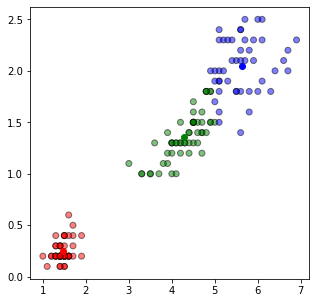

In [992]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

### Final Centroids coordinates of two clusters

In [993]:
centroids

{1: [1.4620000000000002, 0.2459999999999999],
 2: [4.292592592592593, 1.359259259259259],
 3: [5.626086956521738, 2.0478260869565217]}

In [1043]:
import sklearn.metrics as metrics

score = metrics.accuracy_score(iris.target,df['closest'])
score

0.006666666666666667

In [968]:
 def compute_sse(centroids):
    distance = 0
    s = 0
    distance = np.zeros(df['petal length (cm)'].shape[0])
    d = df
    distance = np.zeros(counts[0])
    #for i in centroids.keys():
    
    for i in range(df['petal length (cm)'].shape[0]):
        if(df['color'].values[i] == 'r'):
            s = s+1
            distance = ((c - centroids[1][0]) ** 2 + (c - centroids[1][1]) ** 2)
    k = distance.sum()
    return k

In [969]:
km = compute_sse(centroids)


In [970]:
km

76.8884

In [943]:
centroids1 = {1: [1.7, 0.4]}
centroids2 = {1: [1.7, 0.4], 2: [5.1, 1.6]}
centroids3 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8]}
centroids4 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3]}
centroids5 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4]}
centroids6 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4], 6: [6.0,2.5]}
centroids7 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4], 6: [6.0,2.5], 7: [1.5, 0.2]}
centroids8 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4], 6: [6.0,2.5], 7: [1.5, 0.2], 8:[3.6,1.3]}
centroids9 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4], 6: [6.0,2.5], 7: [1.5, 0.2], 8:[3.6,1.3], 9: [4.9, 1.8]}
centroids10 = {1: [1.7, 0.4], 2: [5.1, 1.6], 3: [6.0, 1.8], 4: [1.5, 0.3], 5: [4.7,1.4], 6: [6.0,2.5], 7: [1.5, 0.2], 8:[3.6,1.3], 9: [4.9, 1.8], 10: [5.0, 1,5]}


### K-means clustering with Euclidean

In [1036]:
mode = "euclidean"
sse_euclidean = []

k_rng = range(1,100)
for k in k_rng:
    if(k == 1):
        centroids = copy.deepcopy(centroids1)
    elif(k == 2):
        centroids = copy.deepcopy(centroids2)
    elif(k == 3):
        centroids = copy.deepcopy(centroids3)
    elif(k == 4):
        centroids = copy.deepcopy(centroids4)
    elif(k == 5):
        centroids = copy.deepcopy(centroids5)
    elif(k == 6):
        centroids = copy.deepcopy(centroids6)
    elif(k == 7):
        centroids = copy.deepcopy(centroids7)
    elif(k == 8):
        centroids = copy.deepcopy(centroids8)
    elif(k == 9):
        centroids = copy.deepcopy(centroids9)
    elif(k == 10):
        centroids = copy.deepcopy(centroids10)
    
    colmap = {1:'r', 2:'g', 3:'b', 4:'r', 5:'g', 6:'b', 7:'r', 8:'g', 9:'y', 10: 'b'}
    df = assignment(df, centroids, mode)
    c = df[df['color']=='r']['petal length (cm)']
    centroids = update(centroids)
    df = assignment(df, centroids, mode)
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(centroids)
        df = assignment(df, centroids, mode)
        if closest_centroids.equals(df['closest']):
            break
    sse_error = compute_sse(centroids)
    sse_euclidean.append(sse_error)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

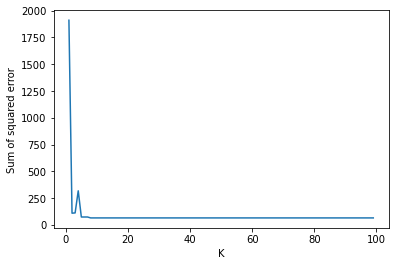

In [1037]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_euclidean)
plt.plot

### K-means clustering with Cosine

In [1029]:
mode = "cosine"
sse_cosine = []

k_rng = range(1,100)
for k in k_rng:
    if(k == 1):
        centroids = copy.deepcopy(centroids1)
    elif(k == 2):
        centroids = copy.deepcopy(centroids2)
    elif(k == 3):
        centroids = copy.deepcopy(centroids3)
    elif(k == 4):
        centroids = copy.deepcopy(centroids4)
    elif(k == 5):
        centroids = copy.deepcopy(centroids5)
    elif(k == 6):
        centroids = copy.deepcopy(centroids6)
    elif(k == 7):
        centroids = copy.deepcopy(centroids7)
    elif(k == 8):
        centroids = copy.deepcopy(centroids8)
    elif(k == 9):
        centroids = copy.deepcopy(centroids9)
    elif(k == 10):
        centroids = copy.deepcopy(centroids10)
    colmap = {1:'r', 2:'g', 3:'b', 4:'r', 5:'g', 6:'b', 7:'r', 8:'g', 9:'y', 10: 'b'}
    df = assignment(df, centroids, mode)
    c = df[df['color']=='r']['petal length (cm)']
    centroids = update(centroids)
    df = assignment(df, centroids, mode)
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(centroids)
        df = assignment(df, centroids, mode)
        if closest_centroids.equals(df['closest']):
            break
    sse_error = compute_sse(centroids)
    sse_cosine.append(sse_error)

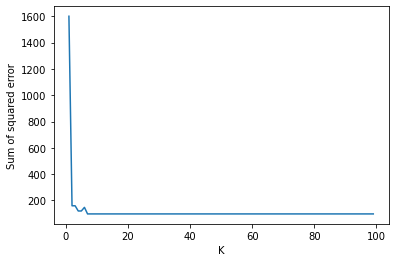

In [1042]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_cosine)
plt.plot

### K-means clustering with Jaccard

In [1040]:
mode = "jaccard"
sse_jacard = []

k_rng = range(1,100)
for k in k_rng:
    if(k == 1):
        centroids = copy.deepcopy(centroids1)
    elif(k == 2):
        centroids = copy.deepcopy(centroids2)
    elif(k == 3):
        centroids = copy.deepcopy(centroids3)
    elif(k == 4):
        centroids = copy.deepcopy(centroids4)
    elif(k == 5):
        centroids = copy.deepcopy(centroids5)
    elif(k == 6):
        centroids = copy.deepcopy(centroids6)
    elif(k == 7):
        centroids = copy.deepcopy(centroids7)
    elif(k == 8):
        centroids = copy.deepcopy(centroids8)
    elif(k == 9):
        centroids = copy.deepcopy(centroids9)
    elif(k == 10):
        centroids = copy.deepcopy(centroids10)
    colmap = {1:'r', 2:'g', 3:'b', 4:'r', 5:'g', 6:'b', 7:'r', 8:'g', 9:'y', 10: 'b'}
    df = assignment(df, centroids, mode)
    c = df[df['color']=='r']['petal length (cm)']
    centroids = update(centroids)
    df = assignment(df, centroids, mode)
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(centroids)
        df = assignment(df, centroids, mode)
        if closest_centroids.equals(df['closest']):
            break
    sse_error = compute_sse(centroids)
    sse_jacard.append(sse_error)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

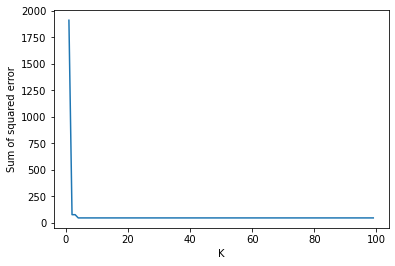

In [1041]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_jacard)
plt.plot

### Comparing the SSEs of Euclidean-Kmeans,Cosine-K-means and Jarcard-K-means

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

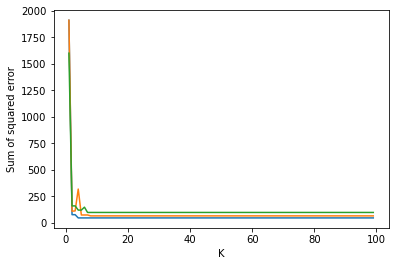

In [1035]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_jacard)
plt.plot(k_rng,sse_euclidean)
plt.plot(k_rng,sse_cosine)
plt.plot